In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 21
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

X0

array([[ 3.74945474,  1.713927  ],
       [ 1.51543487, -0.65331856],
       [ 1.99171537,  1.68036864],
       [ 1.46337064,  2.31540267],
       [ 2.42105072,  0.93439702],
       [ 1.11376033,  1.52426651],
       [ 2.68968231,  2.56119218],
       [ 0.69445149,  0.88052474],
       [ 2.73683739,  3.57463407],
       [ 1.96892491,  1.31655337],
       [ 3.0956297 ,  1.69042336],
       [ 2.72575222,  3.54907163],
       [ 2.63007982,  2.07349324],
       [ 2.73227135,  1.35742461],
       [ 1.82190682,  1.42604544],
       [ 1.79562468,  1.5135049 ],
       [ 1.81422468,  1.61946358],
       [ 2.08897764,  2.06367166],
       [ 2.29634711,  3.40277112],
       [ 0.45313743,  3.29561858],
       [ 1.76274955,  0.76765379]])

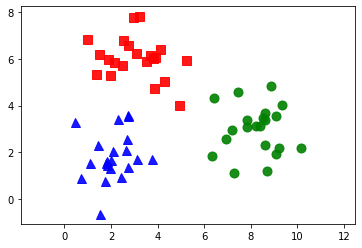

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 9, alpha = .9)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 9, alpha = .9)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 9, alpha = .9)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
initialize_centroids(X, K)

array([[2.73683739, 3.57463407],
       [9.06755846, 1.93836555],
       [0.45313743, 3.29561858]])

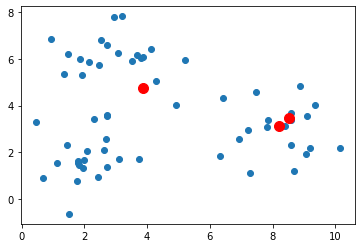

In [6]:
plt.scatter(X[:, 0], X[:, 1])
centroids = initialize_centroids(X, K)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [7]:
def closest_centroid(X, centroids):
    d = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(d, axis=0)

In [8]:
c = initialize_centroids(X, K)
closest_centroid(X, c)

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2])

In [9]:
c

array([[9.34537807, 4.01594215],
       [2.73227135, 1.35742461],
       [3.74945474, 1.713927  ]])

In [10]:
c_extended = c[: , np.newaxis, :]
c_extended

array([[[9.34537807, 4.01594215]],

       [[2.73227135, 1.35742461]],

       [[3.74945474, 1.713927  ]]])

In [11]:
x0 = X[0]
x0

array([3.74945474, 1.713927  ])

In [12]:
(c_extended - x0).shape

(3, 1, 2)

In [13]:
def move_centroids(X, closest, centroids):
    return np.array([X[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [14]:
move_centroids(X, closest_centroid(X, c), c)

array([[8.3171381 , 3.04280382],
       [1.81567086, 2.29562276],
       [3.4414449 , 5.42060873]])

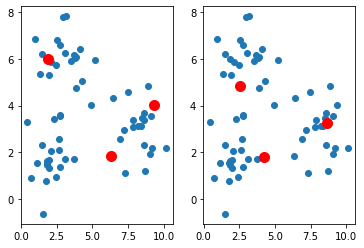

In [15]:
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
centroids = initialize_centroids(X, K)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1])
closest = closest_centroid(X, centroids)
centroids = move_centroids(X, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)